# **Dwonlaod and load data**

In [6]:
!wget https://mde-lab.aegean.gr/images/stories/docs/smear2005.zip
!unzip smear2005.zip


--2021-04-22 14:45:54--  https://mde-lab.aegean.gr/images/stories/docs/smear2005.zip
Resolving mde-lab.aegean.gr (mde-lab.aegean.gr)... 195.251.134.36
Connecting to mde-lab.aegean.gr (mde-lab.aegean.gr)|195.251.134.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89310390 (85M) [application/zip]
Saving to: ‘smear2005.zip.2’

smear2005.zip.2     100%[===================>]  85.17M  16.7MB/s    in 6.4s    

2021-04-22 14:46:01 (13.4 MB/s) - ‘smear2005.zip.2’ saved [89310390/89310390]

Archive:  smear2005.zip
   creating: smear2005/
  inflating: smear2005/B22b_p_Jantzen.pdf  
  inflating: smear2005/New database pictures.zip  
  inflating: smear2005/martin2003.pdf  
  inflating: smear2005/new_database_results.xls  
  inflating: smear2005/norup2005.pdf  
   creating: smear2005/New database pictures/
   creating: smear2005/New database pictures/severe_dysplastic/
  inflating: smear2005/New database pictures/severe_dysplastic/149056321-149056343-001-d.bmp  
  inflat

In [7]:
!ls

sample_data  smear2005	smear2005.zip  smear2005.zip.1	smear2005.zip.2


# **Preprcoessing**

In [8]:
import os

root_dir = '/content/smear2005/New database pictures/'
abnormal = ['carcinoma_in_situ', 'moderate_dysplastic',
            'severe_dysplastic', 'light_dysplastic']
normal = ['normal_superficiel', 'normal_columnar', 'normal_intermediate']


# parse data paths.
db_path = [os.path.join(root_dir, path) for path in os.listdir(root_dir)]

In [9]:
import cv2

X = []
Y = []


for db in db_path:
  image_list = [os.path.join(db, image_path) for image_path in os.listdir(db)]
  # if normal or abnormal
  if db.split('/')[-1] in normal:
    for image_path in image_list:
      if 'd' in image_path.split('-')[-1]:
        pass
      else:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (112, 112))
        X.append(img)
        Y.append(0)
  else:
    for image_path in image_list:
      if 'd' in image_path.split('-')[-1]:
        pass
      else:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (112, 112))
        X.append(img)
        Y.append(1)

In [10]:
import numpy as np


X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(917, 112, 112, 3)
(917,)


In [11]:
print(len(Y[Y==0]))
print(len(Y[Y==1]))

242
675


## **Visualization**

# **Cancer**

1
1


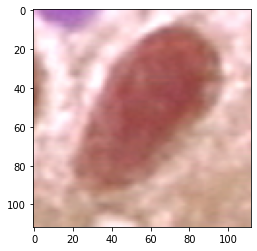

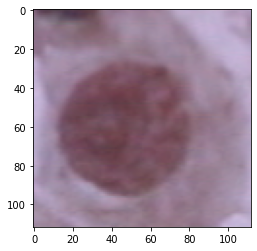

In [15]:
plt.figure()
plt.imshow(X[600])
print(Y[600])
plt.figure()
plt.imshow(X[500])
print(Y[500])

# **Normal**

0
0


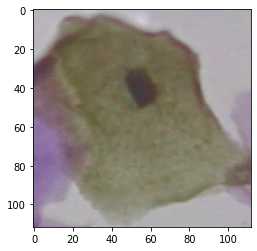

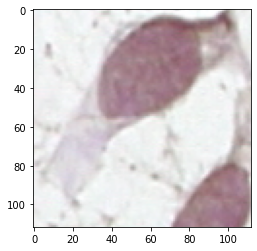

In [16]:
plt.figure()
plt.imshow(X[250])
print(Y[250])
plt.figure()
plt.imshow(X[300])
print(Y[300])

**Split Dataset into train and test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=Y)
print(X_train.shape)
print(X_test.shape)

(825, 112, 112, 3)
(92, 112, 112, 3)


# **Define The Model Architecture**

In [ ]:
import tensorflow as tf

# normal network
# worse results

inputs = tf.keras.layers.Input(shape=(112, 112, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=1)(inputs)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=1)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=1)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), padding='valid', strides=1)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(256, (3, 3), padding='valid', strides=1)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model= tf.keras.models.Model(inputs, x)

print(model.summary())

# Try Different Architecture for Transfer Learning

1- VGG16
2- ResNet
3- DenseNet
4- Xception
5- NasNetMobile
6- Inception
7 - EfficientNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Add, BatchNormalization, concatenate
from tensorflow.keras.layers import AveragePooling2D


def Transfer_Learn(input_shape, classes, included_layers=1, model='ResNet50'):
  model_database = ['VGG16', 'ResNet50', 'ResNet50V2', 'DenseNet121', 'DenseNet169',
                    'DenseNet201', 'Xception', 'MobileNet', 'MobileNetV2', 
                    'NASNetMobile', 'InceptionV3', 'EfficientNetB0']
  image_input = Input(input_shape)

  print('Model is being loaded...')
  # select the model
  if model == 'ResNet50':
    model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg')  
  elif model == 'ResNet50V2':
    model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg')       
  elif model == 'VGG16':
    model = tf.keras.applications.VGG16(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg')    
  elif model == 'DenseNet121':
    model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg')   
  elif model == 'DenseNet169':
    model = tf.keras.applications.DenseNet169(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg') 
  elif model == 'DenseNet201':
    model = tf.keras.applications.DenseNet201(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg') 
  elif model == 'Xception':
    model = tf.keras.applications.Xception(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg') 
  elif model == 'MobileNet':
    model = tf.keras.applications.MobileNet(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg') 
  elif model == 'MobileNetV2':
    model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg') 
  elif model == 'InceptionV3':
    model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg') 
  elif model == 'NASNetMobile':
    model = tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg') 
  elif model == 'EfficientNetB0':
    model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet',
    input_shape=input_shape, pooling='avg') 
  else:
    print(f'Wrong model name. \nAvailable models are: {model_database}')


  # reduce trainability     
  for layer in model.layers[:-included_layers]:
    layer.trainable = False
  print(f'Training {included_layers} Layers from {len(model.layers)}...') 
  # add classification layers
  last_layer = model(image_input)
  if classes > 1:
    act = 'softmax'
  else:
    act = 'sigmoid'
  out = Dense(classes, activation=act, name='output_layer')(last_layer)
  custom_model = tf.keras.models.Model(inputs=image_input,outputs=out)

  return custom_model

In [ ]:
model = Transfer_Learn(input_shape=(112, 112, 3), classes=1, included_layers=4,
                       model='EfficientNetB0')
print(model.summary())

Model is being loaded...
16711680/16705208 [==============================] - 0s 0us/step
Training 4 Layers from 238...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 112, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 1280)              4049571   
_________________________________________________________________
output_layer (Dense)         (None, 1)                 1281      
Total params: 4,050,852
Trainable params: 413,441
Non-trainable params: 3,637,411
_________________________________________________________________
None


# **Train The Model**

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=200, batch_size=64, 
                    callbacks=tf.keras.callbacks.EarlyStopping(patience=15))

Epoch 1/200
13/13 [==============================] - 40s 317ms/step - loss: 0.4999 - accuracy: 0.7633 - val_loss: 0.4464 - val_accuracy: 0.8587
Epoch 2/200
13/13 [==============================] - 1s 88ms/step - loss: 0.2644 - accuracy: 0.8866 - val_loss: 0.3513 - val_accuracy: 0.8696
Epoch 3/200
13/13 [==============================] - 1s 88ms/step - loss: 0.1977 - accuracy: 0.9135 - val_loss: 0.2946 - val_accuracy: 0.8913
Epoch 4/200
13/13 [==============================] - 1s 87ms/step - loss: 0.1256 - accuracy: 0.9650 - val_loss: 0.2865 - val_accuracy: 0.8913
Epoch 5/200
13/13 [==============================] - 1s 88ms/step - loss: 0.1158 - accuracy: 0.9574 - val_loss: 0.2242 - val_accuracy: 0.9239
Epoch 6/200
13/13 [==============================] - 1s 88ms/step - loss: 0.0850 - accuracy: 0.9785 - val_loss: 0.2112 - val_accuracy: 0.9130
Epoch 7/200
13/13 [==============================] - 1s 88ms/step - loss: 0.0658 - accuracy: 0.9834 - val_loss: 0.2022 - val_accuracy: 0.9348
Epoc

# **Training and Testing Curvers**

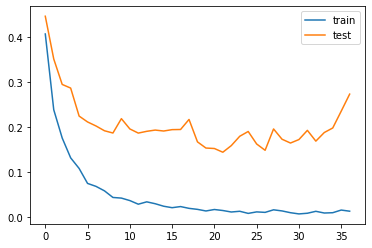

In [ ]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

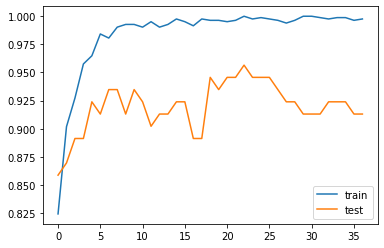

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Results

In [ ]:
from sklearn.metrics import classification_report 


preds = np.around(model.predict(X_test))
rep = classification_report(Y_test, preds)
print(rep)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.94      0.94      0.94        68

    accuracy                           0.91        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.91      0.91      0.91        92



# **Predict**

label is: 1
predicted probability for cancer is: [[0.9987633]]


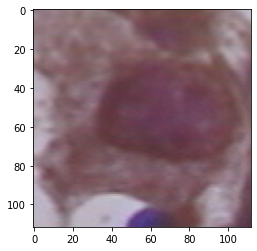

In [ ]:
# predict an unknown sample

sample = X[100]
print(f'label is: {Y[100]}')

pred = model.predict(sample.reshape(-1, 112, 112, 3))
print(f'predicted probability for cancer is: {pred}')

plt.imshow(sample)